# Project 3: Reddit 

**Import libraries**

In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
#https://stackoverflow.com/questions/59799041/why-reddit-return-502-error-when-accessing-a-page-using-beautifulsoup4
headers = {'user-agent':'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Mobile Safari/537.36'}
url = "https://api.pushshift.io/reddit/search/submission/" #Get the url
def read_data(params):
    response = requests.get(url, headers=headers,params=params)
    if response.status_code == 200:
        return response.json()['data'] 
    else:
        return []

In [111]:
def read_reddit_data(subreddit,num_records):
    before = None
    posts = []
    
    while(len(posts)<num_records):
        response = read_data({'subreddit': subreddit, 
                              'size':100, 
                              'sort':'desc',
                              'sort_type':'created_utc', 
                              'before':before, 
                              'fields':["id", "created_utc", "title", "selftext", "subreddit",
                                        "author_flair_text","link_flair_text"]})
        for post in response:
             if post.get('selftext', "").strip(" ") != "" :
                    posts.append(post)
        before = response[-1].get("created_utc")
 #https://stackoverflow.com/questions/20592808/add-all-elements-of-an-iterable-to-list
        time.sleep(1) # pauses for a second between each requests
    return posts

In [112]:
violin_subreddit = read_reddit_data("violinist",1000)

In [113]:
cello_subreddit = read_reddit_data("cello",1000)

In [114]:
len(violin_subreddit)

1067

In [115]:
len(cello_subreddit)

1027

In [116]:
# Turn list of dictionaries to a data frame!
violinist_df = pd.DataFrame(violin_subreddit)
violinist_df.head(10)

,author_flair_text,created_utc,id,link_flair_text,selftext,subreddit,title
0,None,1623866739,o1b7t4,Setup/Equipment,I just got my first violin last week and I am ...,violinist,Bridge Question
1,None,1623864467,o1aamm,NaN,"Hi, I'm sorry if I'm in the wrong subreddit! ...",violinist,Donating Violin?
2,None,1623854143,o16ckr,NaN,"Hi, I'm a beginner musician but I want to work...",violinist,How to become music tutor
3,Student,1623849616,o14pqh,Setup/Equipment,How do you practice when it is so hot inside?,violinist,Practice in heat
4,None,1623848983,o14htd,NaN,I always just instinctively play open D string...,violinist,Whats the first thing you do when you pick up ...
5,None,1623819643,o0x5az,NaN,"Hello, I'm an amateur violinist, I have stoppe...",violinist,What's a good way to improve your bowing?
6,Adult Beginner,1623804923,o0szzo,NaN,"I decided to do something different, this week...",violinist,Practice Journal 07 - 13 June 2021
7,None,1623787272,o0n7os,NaN,I've been trying to utilize drones in my pract...,violinist,Drone machines that allow multiple tones at once?
8,None,1623783569,o0lttl,NaN,Due to some unfortunate circumstances (and ter...,violinist,Help!
9,None,1623776195,o0j053,NaN,1. How often do you rosin?\n2. Much much / how...,violinist,Rosin questions


In [117]:
# Turn list of dictionaries to a data frame!
cello_df = pd.DataFrame(cello_subreddit)
cello_df.head(10)

,author_flair_text,created_utc,id,selftext,subreddit,title
0,None,1623829311,o0zfou,"I played the cello for ~10 years, but haven’t ...",Cello,String Recommendations
1,None,1623812767,o0v9gr,How feasible would it be to self-teach myself ...,Cello,Self-teaching myself the cello
2,None,1623808690,o0u325,[deleted],Cello,"""Blackbird"" Cello Cover by Jacob Staron"
3,None,1623804745,o0sy1b,I'm looking to do some fun pedal stuff with my...,Cello,Best pick up for cello?
4,None,1623791621,o0or64,This is embarrassing to say but honestly my in...,Cello,Any tips on improving intonation?
5,None,1623772571,o0hn28,Hey there people from r/Cello!\n\nI'm looking ...,Cello,I'm looking for a cello player for a Zelda Arr...
6,None,1623770561,o0gvzw,[removed],Cello,I can't relax... help
7,None,1623763528,o0eawx,"Hi everyone,\n\nBeen playing cello off and on ...",Cello,How do you all practice?
8,None,1623681716,nzocca,I'm a good month into learning the cello and n...,Cello,Struggle with stretching my fingers
9,None,1623663397,nzizuq,"Hi, this is so silly. But I used to study the ...",Cello,Need practicing pieces! (used to be a professi...


In [118]:
cello_df['author_flair_text'].value_counts(normalize=True)

Student                0.862745
Bachelor of Music      0.058824
Name of your group     0.019608
High School Student    0.019608
cello prof.            0.019608
Arrangements/Comp      0.019608
Name: author_flair_text, dtype: float64

<AxesSubplot:>

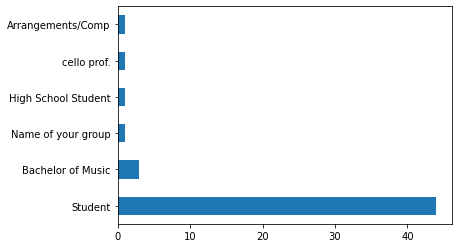

In [124]:
cello_df['author_flair_text'].value_counts().plot(kind='barh')

In [12]:
violinist_df['author_flair_text'].value_counts(normalize=True)

Adult Beginner      0.314136
Student             0.157068
Intermediate        0.120419
Teacher             0.083770
Amateur             0.083770
Beginner            0.083770
Expert              0.062827
Soloist             0.041885
Music Major         0.031414
Viola               0.010471
Gigging Musician    0.005236
Advanced            0.005236
Name: author_flair_text, dtype: float64

<AxesSubplot:>

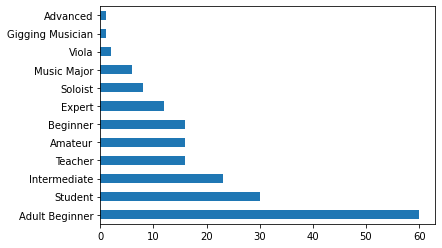

In [13]:
violinist_df['author_flair_text'].value_counts().plot(kind='barh')

In [14]:
violinist_df['link_flair_text'].value_counts(normalize=True)

Setup/Equipment               0.396296
Technique                     0.251852
Feedback                      0.185185
Original                      0.088889
Definitely Not About Cases    0.037037
Violin Jam                    0.018519
Share Your Playing            0.007407
Help me Find Resources        0.003704
Question                      0.003704
**IMPORTANT**                 0.003704
Composing                     0.003704
Name: link_flair_text, dtype: float64

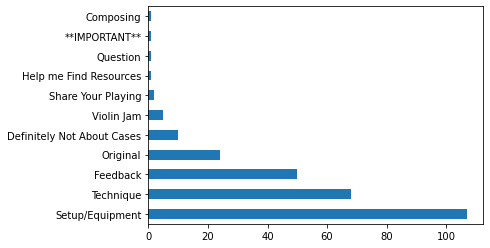

In [15]:
violinist_df['link_flair_text'].value_counts().plot(kind='barh');

In [16]:
cv = CountVectorizer(stop_words='english')

In [17]:
cv.fit(cello_df['title'])
cello_cv = cv.transform(cello_df['title'])
cello_cv_df = pd.DataFrame(cello_cv.todense(),columns=cv.get_feature_names())
cello_cv_df.head()

,02,10,100,1000,11,110,122,14,1400,170,...,zoom,аbоut,аnd,еxpеriеnсe,нis,оf,оnly,раssed,сallеd,тhеre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'key words')

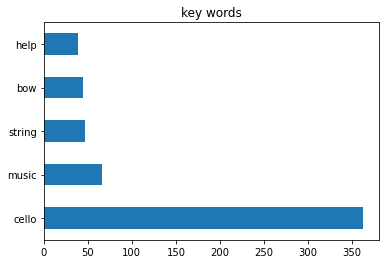

In [60]:
cello_cv_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')
plt.title('key words')

In [19]:
cv.fit(violinist_df['title'])
violinist_cv = cv.transform(violinist_df['title'])
violinist_cv_df = pd.DataFrame(violinist_cv.todense(),columns=cv.get_feature_names())
violinist_cv_df.head()

,07,10,100,101,11,13,15,16ths,17,18,...,ysaye,ysaÿe,ysv104,zdzislaw,zigeunerweisen,zimmer,zoom,сriticism,バージョン,春のソナタ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
cello_cv_df.sum().sort_values(ascending=False).head(15)

cello       362
music        66
string       47
bow          44
help         39
question     37
looking      35
playing      32
beginner     32
new          32
zoom         31
play         29
does         28
advice       28
good         27
dtype: int64

In [89]:
violinist_cv_df.sum().sort_values(ascending=False).head(15)

violin       293
bow           57
help          49
music         44
question      43
play          43
playing       43
beginner      39
string        38
new           35
strings       35
violinist     32
practice      32
good          30
teacher       29
dtype: int64

Text(0.5, 1.0, 'key words')

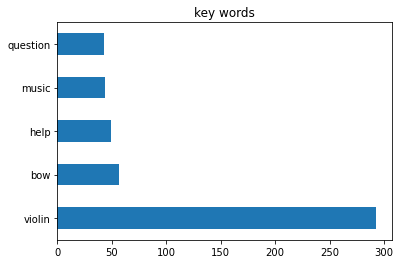

In [59]:
violinist_cv_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')
plt.title('key words')

In [21]:
reddit_data = pd.concat([violinist_df,cello_df])

In [22]:
reddit_data.head(3)

,author_flair_text,created_utc,id,selftext,subreddit,title,link_flair_text
0,None,1623854143,o16ckr,"Hi, I'm a beginner musician but I want to work...",violinist,How to become music tutor,NaN
1,Student,1623849616,o14pqh,How do you practice when it is so hot inside?,violinist,Practice in heat,Setup/Equipment
2,None,1623848983,o14htd,I always just instinctively play open D string...,violinist,Whats the first thing you do when you pick up ...,NaN


In [23]:
reddit_data['author_flair_text'].value_counts(normalize=True)

Student                0.305785
Adult Beginner         0.247934
Intermediate           0.095041
Teacher                0.066116
Beginner               0.066116
Amateur                0.066116
Expert                 0.049587
Soloist                0.033058
Music Major            0.024793
Bachelor of Music      0.012397
Viola                  0.008264
Advanced               0.004132
Name of your group     0.004132
Arrangements/Comp      0.004132
High School Student    0.004132
Gigging Musician       0.004132
cello prof.            0.004132
Name: author_flair_text, dtype: float64

<AxesSubplot:>

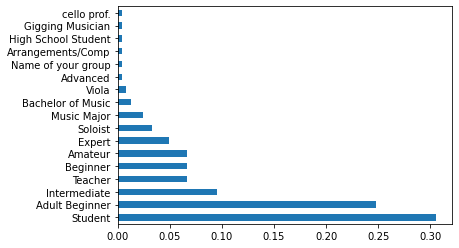

In [24]:
reddit_data['author_flair_text'].value_counts(normalize=True).plot(kind='barh')

In [25]:
cv.fit(reddit_data['title'])
reddit_data_cv = cv.transform(reddit_data['title'])
reddit_df = pd.DataFrame(reddit_data_cv.todense(),columns=cv.get_feature_names())
reddit_df.head()

,02,07,10,100,1000,101,11,110,122,13,...,еxpеriеnсe,нis,оf,оnly,раssed,сallеd,сriticism,тhеre,バージョン,春のソナタ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

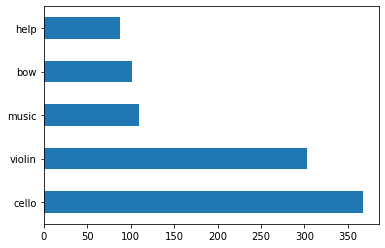

In [58]:
reddit_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')

In [27]:
# Create Binary y column based on subreddit name
reddit_data['y'] = reddit_data['subreddit'].map(lambda x: 1 if x == 'violinist'else 0)

In [28]:
# Save data frame to csv
reddit_data.to_csv('../data/reddit_data.csv', index=False)

In [29]:
# read in collected subreddits
reddit_data = pd.read_csv('../data/reddit_data.csv')
reddit_data.head(3)

,author_flair_text,created_utc,id,selftext,subreddit,title,link_flair_text,y
0,NaN,1623854143,o16ckr,"Hi, I'm a beginner musician but I want to work...",violinist,How to become music tutor,NaN,1
1,Student,1623849616,o14pqh,How do you practice when it is so hot inside?,violinist,Practice in heat,Setup/Equipment,1
2,NaN,1623848983,o14htd,I always just instinctively play open D string...,violinist,Whats the first thing you do when you pick up ...,NaN,1


In [30]:
# check random row 'title'
reddit_data['title'][4]

'Practice Journal 07 - 13 June 2021'

In [31]:
#check shape of the data
reddit_data.shape

(2027, 8)

In [32]:
#check for missing values
reddit_data.isnull().sum()

author_flair_text    1785
created_utc             0
id                      0
selftext                0
subreddit               0
title                   0
link_flair_text      1757
y                       0
dtype: int64

In [33]:
reddit_data['y'].value_counts(normalize=True)

0    0.50666
1    0.49334
Name: y, dtype: float64

In [34]:
features='title'
X = reddit_data[features]
y = reddit_data['y']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 stratify=y) 

In [36]:
X_train.shape

(1520,)

In [37]:
y_train.shape

(1520,)

In [100]:
#cv,rf
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('rfc', RandomForestClassifier())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9973684210526316, 0.7317554240631163)

In [101]:
#cv,lg
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('lg', LogisticRegressionCV(solver='liblinear'))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9947368421052631, 0.6883629191321499)

In [102]:
#cv,dt
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9973684210526316, 0.7041420118343196)

In [103]:
#cv,mnb
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9151315789473684, 0.7297830374753451)

In [104]:
#tfidf,logreg
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegressionCV(solver='liblinear'))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8947368421052632, 0.7140039447731755)

In [43]:
#tfidf,mnb
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9269736842105263, 0.7218934911242604)

In [44]:
 from sklearn.model_selection import GridSearchCV

In [45]:
 params_grid = {
    'rfc__n_estimators': [100, 150, 200],
    'rfc__max_depth': [None, 1, 2, 3, 4, 5]
}

In [46]:
best_pipe = Pipeline([
    ('cv',CountVectorizer()),
    ('rfc',RandomForestClassifier())])

In [47]:
gs = GridSearchCV(estimator = best_pipe, param_grid = params_grid, cv = 5,verbose=1)

In [48]:
gs.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'cv', 'rfc', 'cv__analyzer', 'cv__binary', 'cv__decode_error', 'cv__dtype', 'cv__encoding', 'cv__input', 'cv__lowercase', 'cv__max_df', 'cv__max_features', 'cv__min_df', 'cv__ngram_range', 'cv__preprocessor', 'cv__stop_words', 'cv__strip_accents', 'cv__token_pattern', 'cv__tokenizer', 'cv__vocabulary', 'rfc__bootstrap', 'rfc__ccp_alpha', 'rfc__class_weight', 'rfc__criterion', 'rfc__max_depth', 'rfc__max_features', 'rfc__max_leaf_nodes', 'rfc__max_samples', 'rfc__min_impurity_decrease', 'rfc__min_impurity_split', 'rfc__min_samples_leaf', 'rfc__min_samples_split', 'rfc__min_weight_fraction_leaf', 'rfc__n_estimators', 'rfc__n_jobs', 'rfc__oob_score', 'rfc__random_state', 'rfc__verbose', 'rfc__warm_start'])

In [49]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__n_estimators': [100, 150, 200]},
             verbose=1)

In [50]:
gs.best_score_

0.7289473684210527

In [51]:
# Evaluate model.
print(f'Score on training set: {gs.score(X_train, y_train)}')
print(f'Score on testing set: {gs.score(X_test, y_test)}')

Score on training set: 0.9973684210526316
Score on testing set: 0.7297830374753451


In [52]:
gs.best_params_

{'rfc__max_depth': None, 'rfc__n_estimators': 150}

In [53]:
# Use best scoring model to evaluate
predictions = gs.predict(X_test)
cm = confusion_matrix(y_test, predictions)

In [54]:
# Convert confusion matrix to dataframe
cm_df = pd.DataFrame(cm,
                    columns = ['predicted negative', 'predicted positive'],
                    index = ['actual negative', 'actual positive'])
cm_df

,predicted negative,predicted positive
actual negative,157,100
actual positive,37,213


In [55]:
# Calculate model accuracy
accuracy =(257+128)/(257+128+130+10)
accuracy*100

73.33333333333333

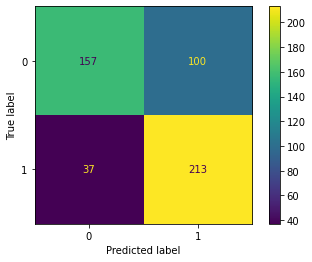

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs, X_test, y_test)

In [106]:
# store predictions
preds = gs.predict(X_test)

# mash up X and y test vals into one df
test_df = pd.concat([X_test, y_test], axis=1)

# add preds to df
test_df['preds'] = preds

In [107]:
test_df[test_df['y'] != test_df['preds']]

,title,y,preds
117,Tablets for music?,1,0
801,Auditioning for a college orchestra and need a...,1,0
296,"Paul Wiancko, Michi Wiancko, Ayane Kozasa, Jud...",1,0
1647,Cubital tunnel syndrome,0,1
260,Dvorak - Serenade for strings,1,0
...,...,...,...
1020,David Finkel's Metronome,0,1
224,Need help for an 8 year old,1,0
143,Online Middle School String Camps? (Perhaps in...,1,0
1498,Resources to loearn to read music and play - b...,0,1
